<a href="https://colab.research.google.com/github/BarbaraCarmo/lista02PAI/blob/main/listaPAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limiar calculado por Otsu: 100.0


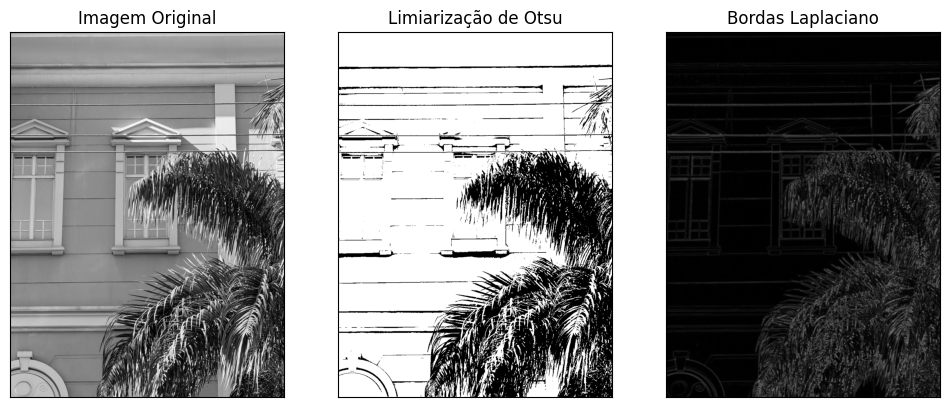

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carregar a imagem (substitua 'caminho/para/sua/imagem.jpg' pelo caminho real da sua imagem)
# Para este exemplo, vamos criar uma imagem de teste simples
# Você pode carregar sua própria imagem comentando as linhas abaixo e descomentando a linha de leitura de imagem real
img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255 # Adiciona um quadrado branco no centro

# Se você tiver uma imagem real, descomente a linha abaixo e substitua o caminho
img = cv2.imread('/media/janela_predio.jpeg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Erro ao carregar a imagem. Verifique o caminho.")
else:
    # --- Limiarização de Otsu ---
    # A Limiarização de Otsu é um método para encontrar automaticamente um valor de limiar global
    # a partir do histograma de uma imagem em tons de cinza. Ele assume que a imagem contém
    # dois picos de histograma (fundo e objeto) e calcula um limiar que minimiza a variância
    # intra-classe das duas classes.

    # O segundo argumento é o valor de limiar inicial (pode ser 0 para Otsu).
    # O terceiro argumento é o valor máximo a ser atribuído aos pixels que excedem o limiar.
    # O quarto argumento é o tipo de limiarização a ser aplicado, combinado com cv2.THRESH_OTSU.
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print(f"Limiar calculado por Otsu: {ret}")

    # --- Segmentação por Bordas Laplaciano ---
    # O operador Laplaciano é um operador de segunda ordem que calcula a segunda derivada espacial
    # de uma imagem. Ele detecta bordas encontrando regiões de rápida variação na intensidade
    # dos pixels. É sensível ao ruído, por isso é comum aplicar um desfoque antes.

    # Aplicar um desfoque Gaussiano para reduzir o ruído
    img_blur = cv2.GaussianBlur(img, (3, 3), 0)

    # Aplicar o operador Laplaciano
    # O primeiro argumento é a imagem de entrada (preferencialmente desfocada).
    # O segundo argumento é a profundidade desejada da matriz de saída (cv2.CV_64F para evitar saturação).
    laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)

    # Converter a saída para uint8 para exibição
    # Os valores Laplacianos podem ser negativos, então pegamos o valor absoluto e convertemos.
    laplacian_8u = np.uint8(np.absolute(laplacian))


    # --- Exibição dos resultados ---
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
    plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray')
    plt.title('Limiarização de Otsu'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 3), plt.imshow(laplacian_8u, cmap='gray')
    plt.title('Bordas Laplaciano'), plt.xticks([]), plt.yticks([])

    plt.show()